In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()
#train.shape

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train['src']='train'
test['src']='test'
data=pd.concat([train,test],ignore_index=True)
data.shape

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


(14204, 13)

In [4]:
data.isnull().sum()


Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
src                             0
dtype: int64

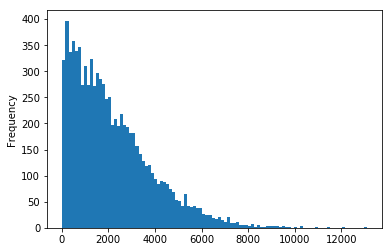

In [5]:
data.Item_Outlet_Sales.plot(kind='hist',bins=100)

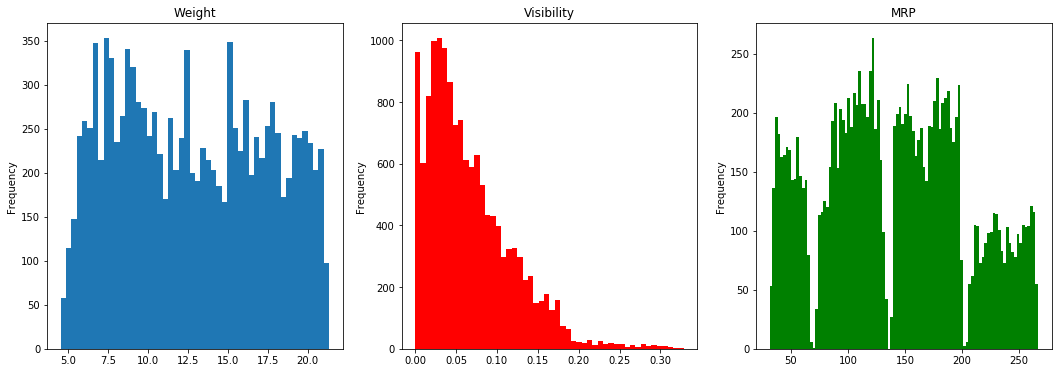

In [7]:
plt.figure(1)
plt.subplot(131)
data.Item_Weight.plot(kind='hist',bins=50,figsize=(18,6),title='Weight')
plt.subplot(132)
data.Item_Visibility.plot(kind='hist',bins=50,title='Visibility',color='r')
plt.subplot(133)
data.Item_MRP.plot(kind='hist',bins=100,title='MRP',color='g')

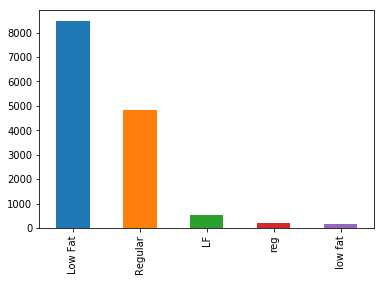

In [6]:
data.Item_Fat_Content.value_counts().plot(kind='bar')

In [8]:
tdf=data.Item_Fat_Content.isin(['LF','Low Fat'])
tdf=tdf[tdf==True]
for i in tdf.index:
    data.at[i,'Item_Fat_Content']='low fat'
#data[dat.i.ipynb_checkpoints/ynb_checkpoints/ipynb_checkpoints/.Item_Fat_Content=='reg']['Item_Fat_Content']='Regular'

In [9]:
tdf=data.Item_Fat_Content.isin(['Regular','reg'])
tdf=tdf[tdf==True]
for i in tdf.index:
    data.at[i,'Item_Fat_Content']='regular'

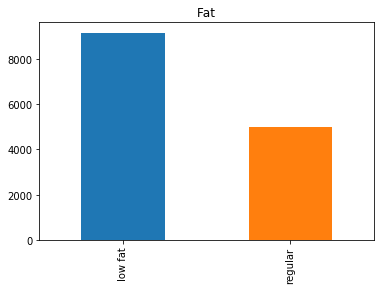

In [10]:
data.Item_Fat_Content.value_counts().plot(kind='bar',title='Fat')

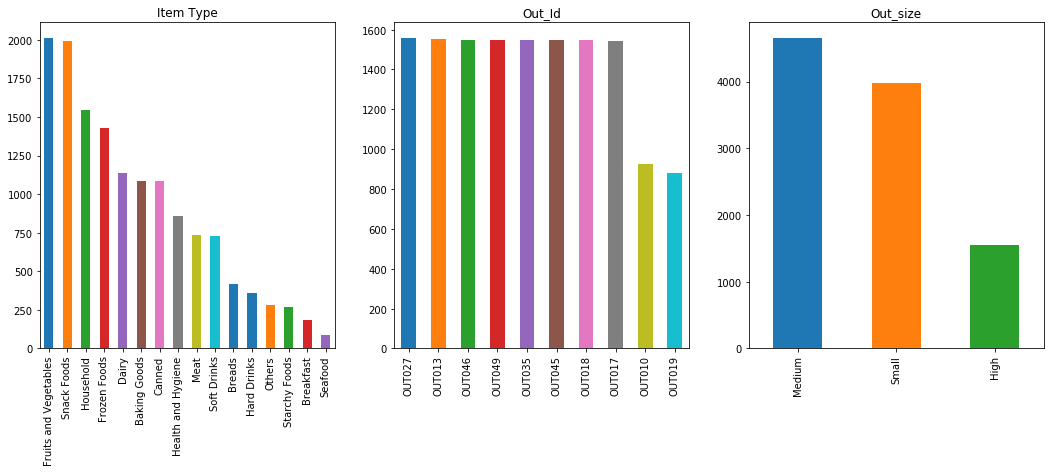

In [11]:
plt.figure(2)
plt.subplot(131)
data.Item_Type.value_counts().plot(kind='bar',title='Item Type',figsize=(18,6))
plt.subplot(132)
data.Outlet_Identifier.value_counts().plot(kind='bar',title='Out_Id')
plt.subplot(133)
data.Outlet_Size.value_counts().plot(kind='bar',title='Out_size')

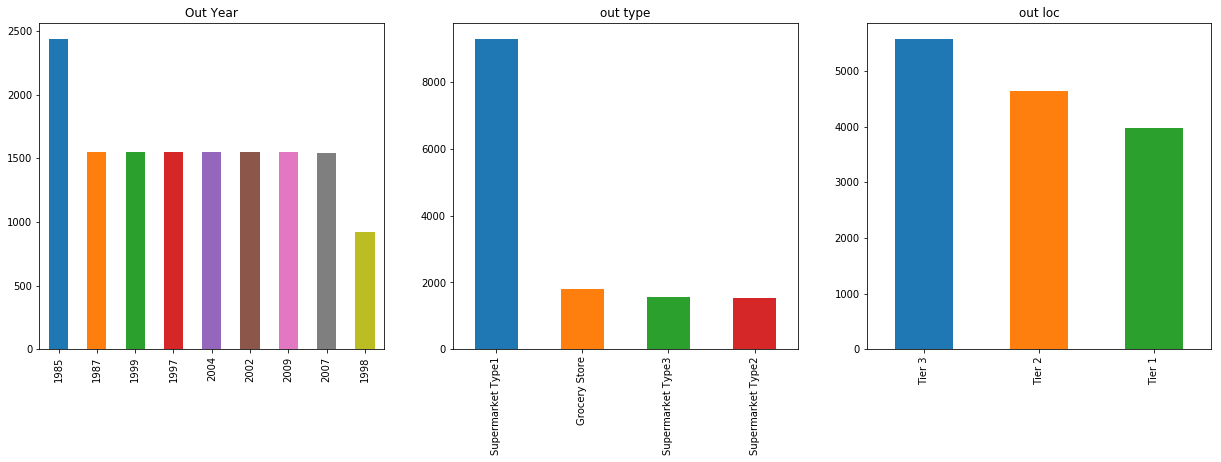

In [12]:
plt.figure(3)
plt.subplot(131)
data.Outlet_Establishment_Year.value_counts().plot(kind='bar',title='Out Year',figsize=(21,6))
plt.subplot(132)
data.Outlet_Type.value_counts().plot(kind='bar',title='out type')
plt.subplot(133)
data.Outlet_Location_Type.value_counts().plot(kind='bar',title='out loc')


In [13]:
train=data.iloc[1:train.shape[0]]

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


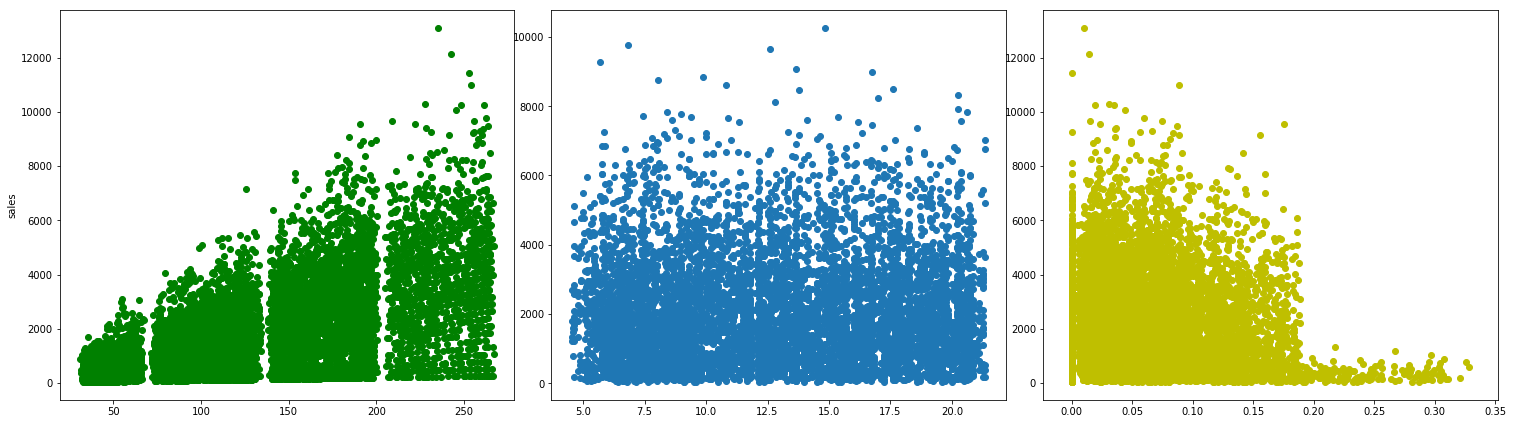

In [14]:
plt.rcParams['figure.figsize']=(21,6)
plt.subplot(131)
plt.ylabel('sales')
plt.scatter(train.Item_MRP,train.Item_Outlet_Sales,color='g')
plt.subplot(132)
plt.tight_layout()
plt.legend()
plt.scatter(train.Item_Weight,train.Item_Outlet_Sales)
plt.subplot(133)
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales,color='y')

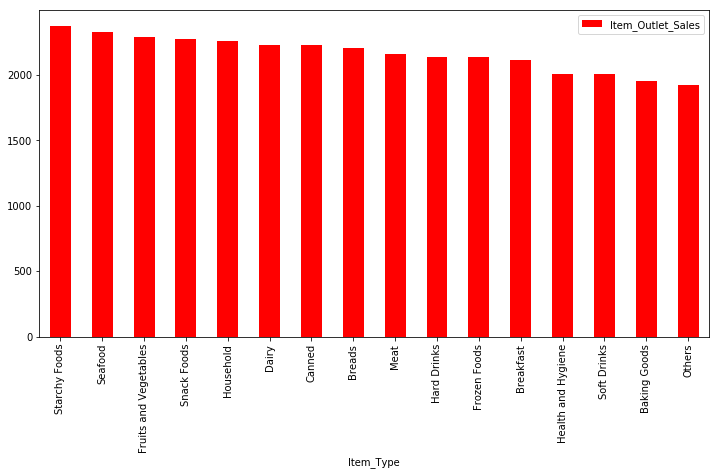

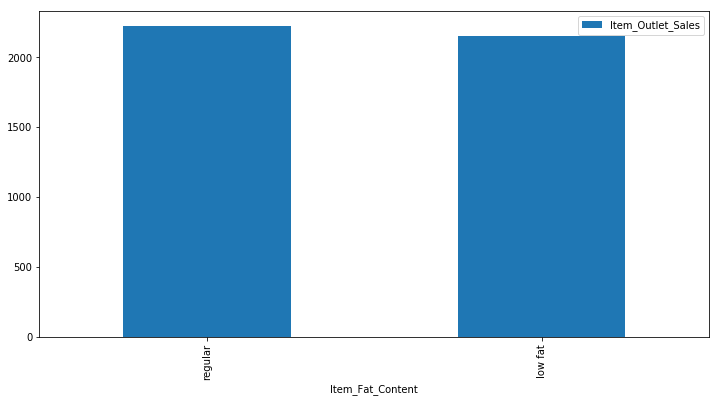

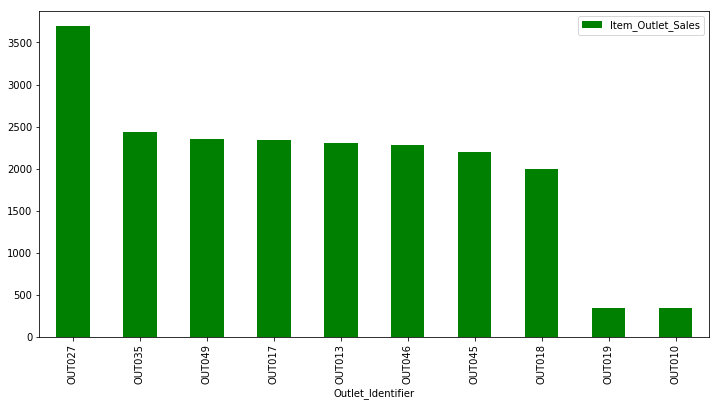

In [15]:

plt.rcParams['figure.figsize']=(12,6)
train.groupby('Item_Type')[['Item_Type','Item_Outlet_Sales']].mean().sort_values(ascending=False,by='Item_Outlet_Sales').plot(kind='bar',color='r')
train.groupby('Item_Fat_Content')[['Item_Fat_Content','Item_Outlet_Sales']].mean().sort_values(ascending=False,by='Item_Outlet_Sales').plot(kind='bar')
train.groupby('Outlet_Identifier')[['Outlet_Identifier','Item_Outlet_Sales']].mean().sort_values(ascending=False,by='Item_Outlet_Sales').plot(kind='bar',color='g')

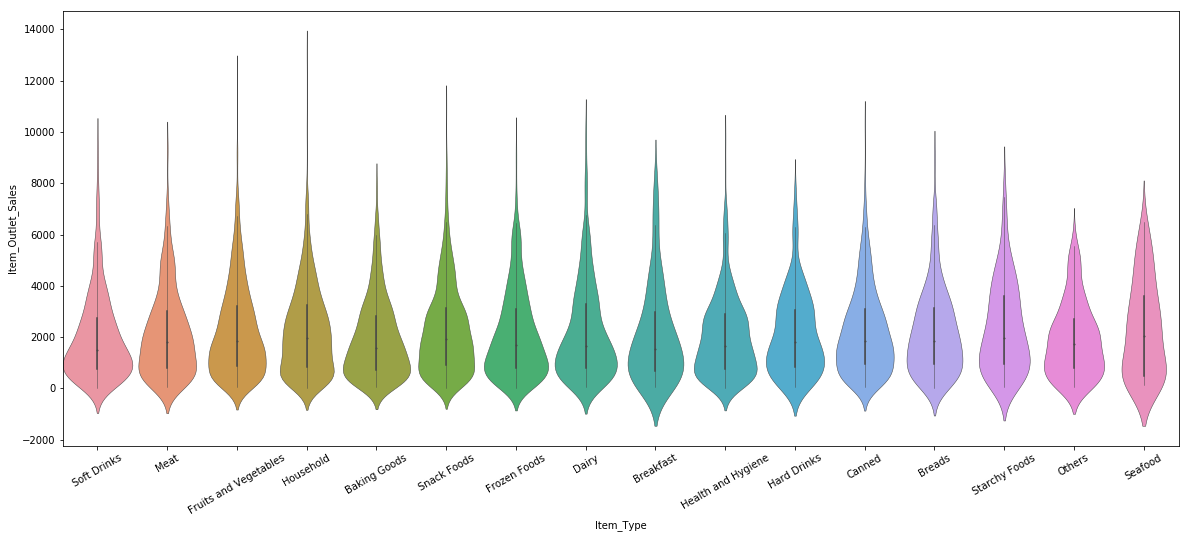

In [16]:
plt.rcParams['figure.figsize']=(20,8)
pl=sns.violinplot(x='Item_Type',y='Item_Outlet_Sales',data=train,linewidth=0.5,width=1)
_=pl.set_xticklabels(labels=train.Item_Type.unique(),rotation=30)
#train.groupby('Item_Fat_Content')[['Item_Fat_Content','Item_Outlet_Sales']].mean().sort_values(ascending=False,by='Item_Outlet_Sales').plot(kind='box')
#train.groupby('Outlet_Identifier')[['Outlet_Identifier','Item_Outlet_Sales']].mean().sort_values(ascending=False,by='Item_Outlet_Sales').plot(kind='box',color='g')

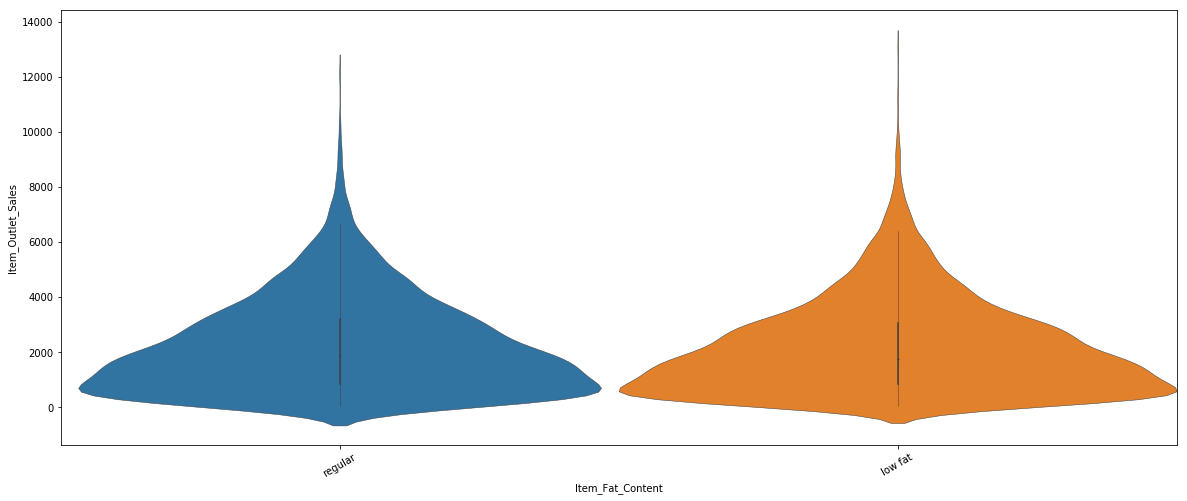

In [17]:
pl=sns.violinplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train,linewidth=0.5,width=1)
_=pl.set_xticklabels(labels=train.Item_Fat_Content.unique(),rotation=30)

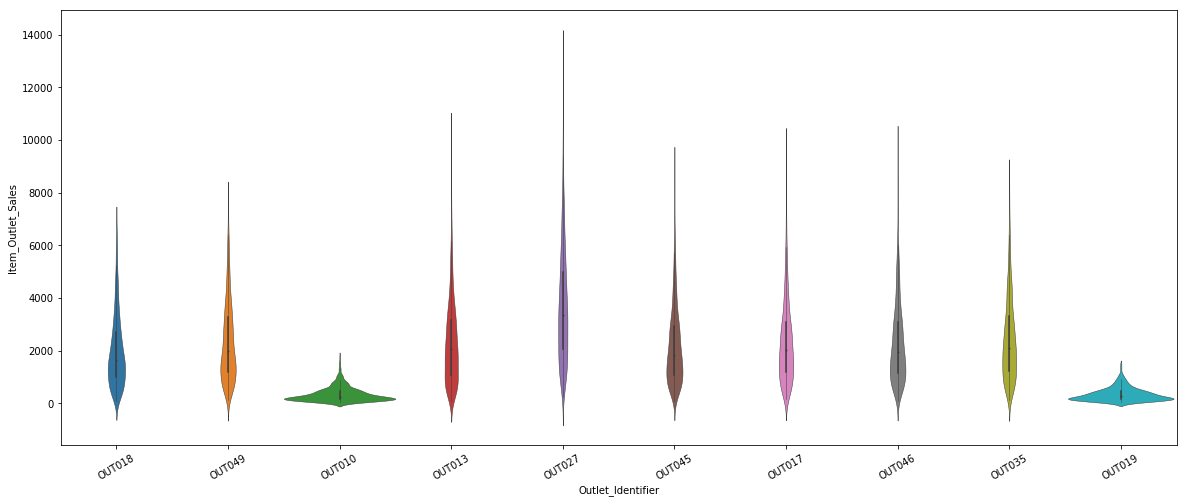

In [19]:
pl=sns.violinplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=train,linewidth=0.5,width=1)
_=pl.set_xticklabels(labels=train.Outlet_Identifier.unique(),rotation=30)

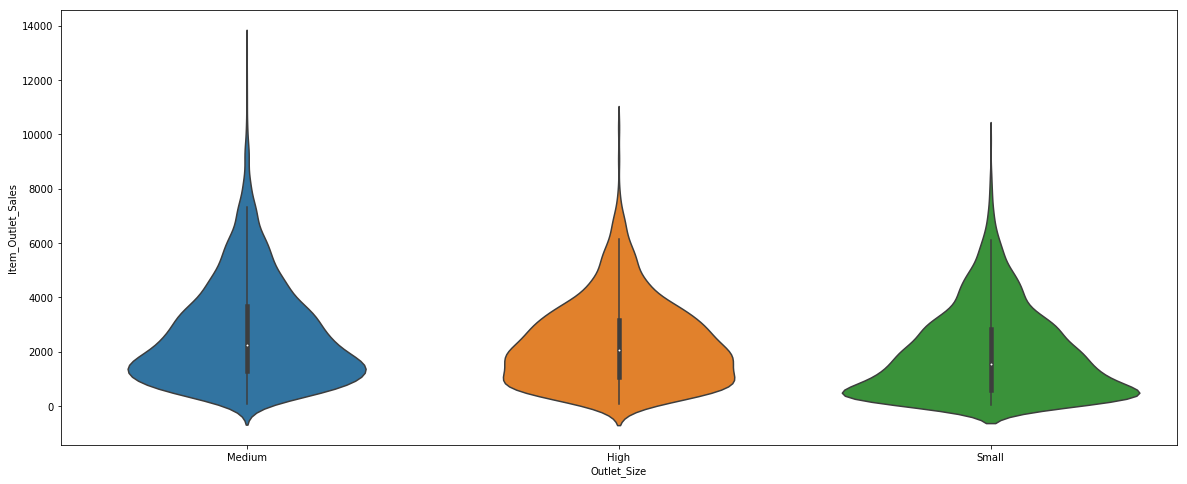

In [20]:

pl=sns.violinplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train,)


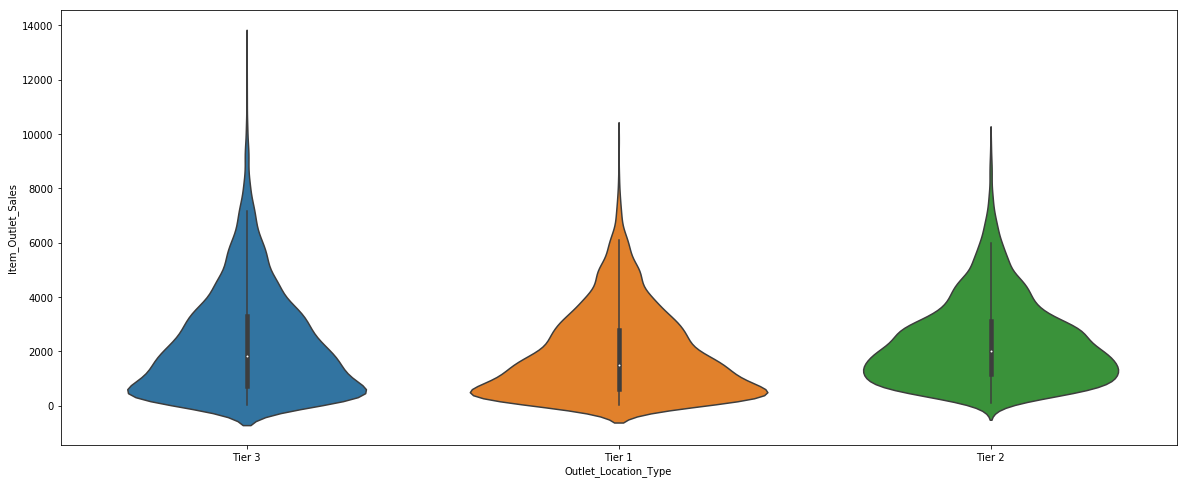

In [21]:
pl=sns.violinplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,)

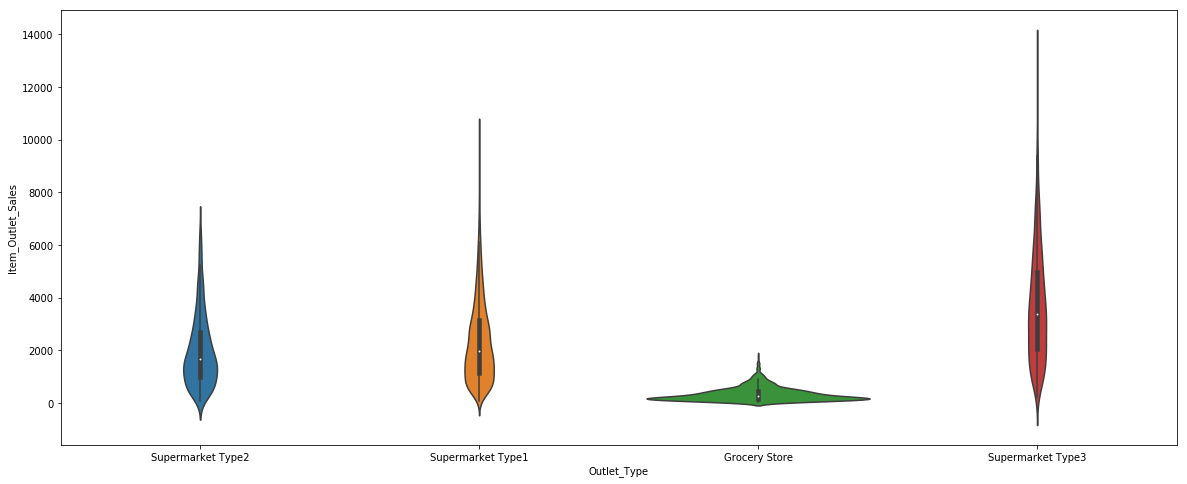

In [22]:

pl=sns.violinplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train,)

In [ ]:
train.isnull().sum()

In [ ]:
pd.to_pickle(train,'tr')

In [ ]:
trp=pd.read_pickle('tr')

In [23]:
wei=data.groupby('Item_Type').Item_Weight.mean()

In [24]:
for name in data.Item_Type.unique():
    df=data[(data.Item_Type==name) & (data.Item_Weight.isnull())]
    for k in list(df.index):
        data.at[k,'Item_Weight']=wei[name]

In [ ]:
wei=data.groupby('Item_Type').Item_Visibility.mean()

In [25]:
for name in data.Item_Type.unique():
    df=data[(data.Item_Type==name) & (data.Item_Visibility==0)]
    for k in list(df.index):
        data.at[k,'Item_Visibility']=wei[name]

In [26]:
train[train.Item_Visibility==0]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,src


In [ ]:
train.Item_Visibility.plot(kind='hist',bins=100)

In [27]:
psd=data.groupby('Outlet_Type')['Outlet_Size'].value_counts()

In [28]:
df=data[data.Outlet_Size.isnull()]
for k in list(df.index):
    if data.at[k,'Outlet_Type'] in ['Grocery Store','Supermarket Type1']:
        data.at[k,'Outlet_Size']='Small'
    else:
        data.at[k,'Outlet_Size']='Medium'

In [29]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data.Item_Type_Combined.value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [30]:
data['Outlet_Years']=2018-data.Outlet_Establishment_Year

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Outlet']=le.fit_transform(data.Outlet_Identifier)
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i].astype(str))

In [32]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [33]:
data.columns

Index(['Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year',
       'Outlet_Identifier', 'src', 'Outlet_Years', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1',
       'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7',
       'Outlet_8', 'Outlet_9'],
      dtype='object')

In [34]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [35]:
train = data.loc[data['src']=="train"]
test = data.loc[data['src']=="test"]

In [36]:
test.drop(['Item_Outlet_Sales','src'],axis=1,inplace=True)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [39]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [37]:
train.drop(['src'],axis=1,inplace=True)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
train.dtypes

Item_Identifier            object
Item_MRP                  float64
Item_Outlet_Sales         float64
Item_Visibility           float64
Item_Weight               float64
Outlet_Identifier          object
Outlet_Years                int64
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Location_Type_2      uint8
Outlet_Size_0               uint8
Outlet_Size_1               uint8
Outlet_Size_2               uint8
Outlet_Type_0               uint8
Outlet_Type_1               uint8
Outlet_Type_2               uint8
Outlet_Type_3               uint8
Item_Type_Combined_0        uint8
Item_Type_Combined_1        uint8
Item_Type_Combined_2        uint8
Outlet_0                    uint8
Outlet_1                    uint8
Outlet_2                    uint8
Outlet_3                    uint8
Outlet_4                    uint8
Outlet_5                    uint8
Outlet_6                    uint8
Outlet_7      

In [69]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

In [41]:
predictors = [x for x in train.columns if x not in [target]+IDcol]

In [54]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(train[predictors],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
IDcol.append(target)
subm=pd.DataFrame({ x: test[x] for x in IDcol})

array([ 1829.1019898 ,  1560.16712497,  1873.09089222, ...,  1810.28779667,
        3598.78225085,  1271.62656845])

In [70]:
subm.to_csv('bigmart.csv',index=False)